<a href="https://colab.research.google.com/github/keesterbrugge/rl_intro_sutton/blob/main/ch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.5

In [54]:
# 2.5 
import numpy as np
import random
from numba import njit

@njit
def bandit_sim():
    

  n_iterations = 100
  n_actions = 3
  epsilon = 0.1
  n_sims = 10

  A = np.arange(n_actions)
  R = np.zeros((n_sims, n_iterations))
  is_action_best=np.zeros((n_sims, n_iterations))

#  @njit
  #def do_bandit(action, q_star):
  #  return np.random.normal(loc=q_star[action], scale=1)

  for s in range(n_sims):
    Q = np.zeros(n_actions)
    N = np.zeros(n_actions)
    #q_star = np.zeros(n_actions)
    q_star = np.random.normal(loc=0, scale=3, size=n_actions)
    for i in range(n_iterations):
      ids =  A if random.random() < epsilon else  A[Q == np.max(Q)]
      action = np.random.choice(ids)
      R[s, i] = np.random.normal(loc=q_star[action], scale=1)
      N[action] += 1
      Q[action] += (R[s, i] - Q[action])/N[action]
      q_star += np.random.normal(loc=0, scale=0.000001, size=q_star.size)
      is_action_best[s, i] = q_star[action] == q_star.max()
  return  R.mean(axis=0)
  # return( R.mean(axis=0), is_action_best.mean(axis=0)  )

In [55]:
bandit_sim()

TypingError: ignored

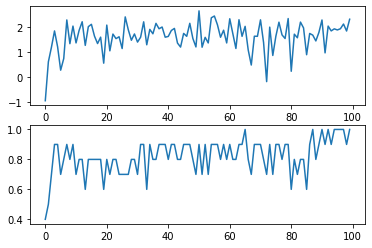

In [37]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
axs[0].plot(np.arange(n_iterations), R.mean(axis=0))
axs[1].plot(np.arange(n_iterations), is_action_best.mean(axis=0))
# is_action_best.mean(axis=0)